# Statistics Tasks

## Statistics Task 1 - Correlation Heatmap Analysis

**Purpose:** This heatmap visualizes the correlation matrix between all chemical attributes and wine quality to identify which features have the greatest impact on wine quality.

**Key Takeaways:**
- The top 3 chemical features most correlated with wine quality are revealed through the correlation values with the 'quality' column
- Red cells indicate positive correlations, while blue cells indicate negative correlations
- This analysis helps us focus on the most influential variables for further statistical modeling and data mining tasks

Top 3 chemical features impacting wine quality:
alcohol        0.484866
sulphates      0.257710
citric acid    0.240821
Name: quality, dtype: float64


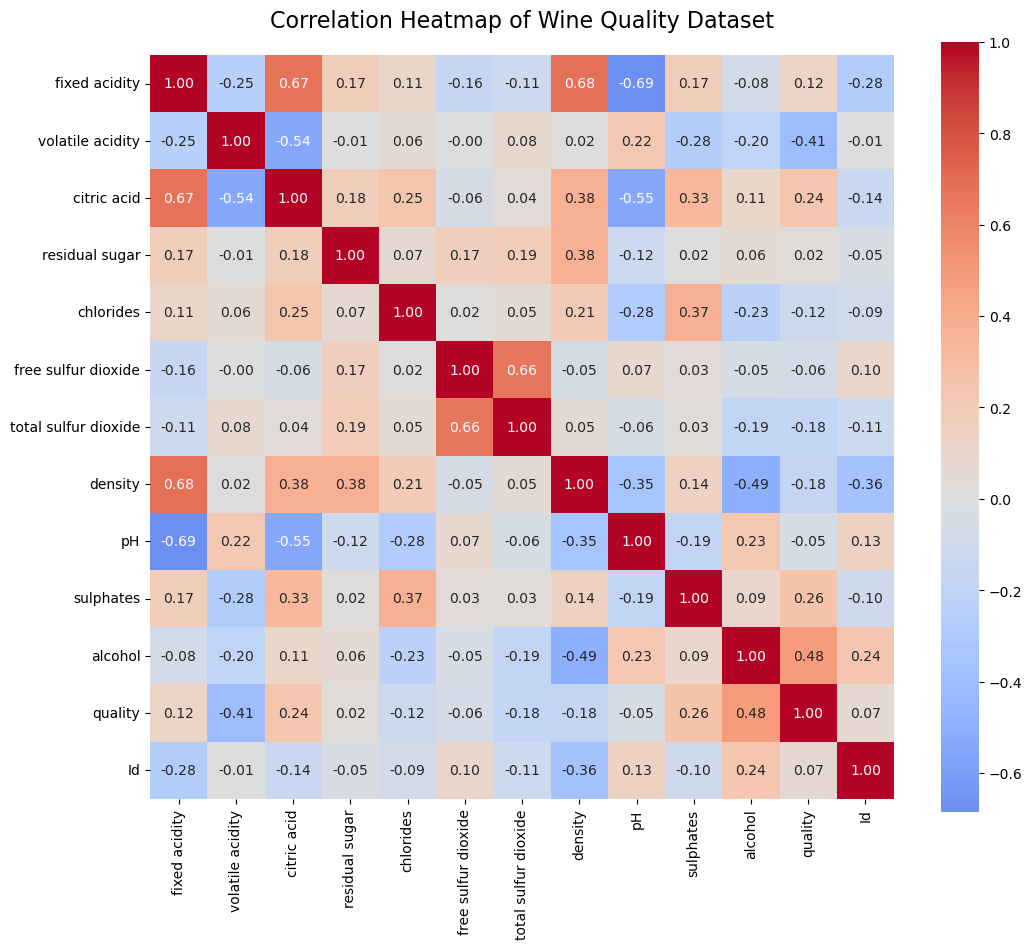

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("WineQT.csv")

corr_with_quality = df.corr()['quality'].drop('quality').sort_values(ascending=False)
top_3_features = corr_with_quality.head(3)

print("Top 3 chemical features impacting wine quality:")
print(top_3_features)

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, square=True)
plt.title("Correlation Heatmap of Wine Quality Dataset", fontsize=16, pad=20)


plt.show()

## Statistics Task 2 - Bar Plot Analysis

**Purpose:** The purpose of this bar plot is to compare the mean values of several key wine attributes alcohol, volatile acidity, citric acid, and density to understand how their average levels differ across the dataset

**Key Takeaways:** 
- The large difference between alcohol and the other attributes suggests that wine chemistry is highly imbalanced across components, with alcohol contributing most to variability in overall composition.

- The plot shows how most chemical attributes appear in low concentrations, while alcohol stands out as a major distinguishing feature across wine samples.

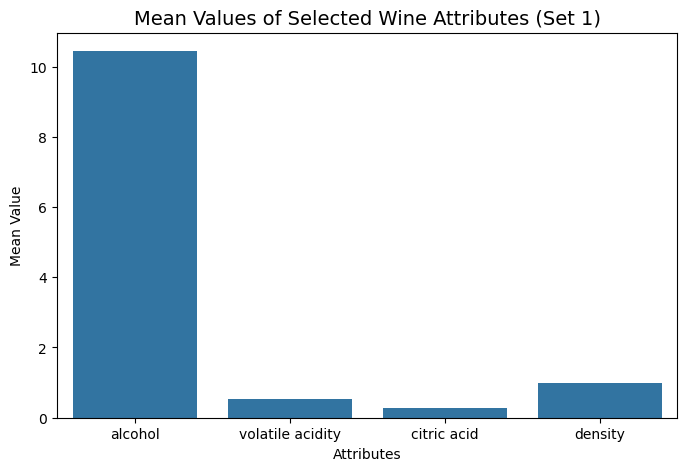

In [4]:
attributes_bar = ['alcohol', 'volatile acidity', 'citric acid', 'density']

means_bar = df[attributes_bar].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=means_bar.index, y=means_bar.values)
plt.title("Mean Values of Selected Wine Attributes", fontsize=14)
plt.ylabel("Mean Value")
plt.xlabel("Attributes")
plt.show()


## Statistics Task 3 - Line Plot Analysis

**Purpose:** The purpose of this line plot is to examine and compare the distribution trends of several wine attributes sulphates, chlorides, free sulfur dioxide, and pH across the dataset

**Key Takeaways:** 
- The contrast between the gradually increasing free sulfur dioxide line and the flatter lines of the other attributes highlights which chemical components differ most across wines.
- This comparison helps reveal how some wine properties (like preservation-related chemicals) vary widely, while others (like acidity and salinity) remain more tightly controlled.


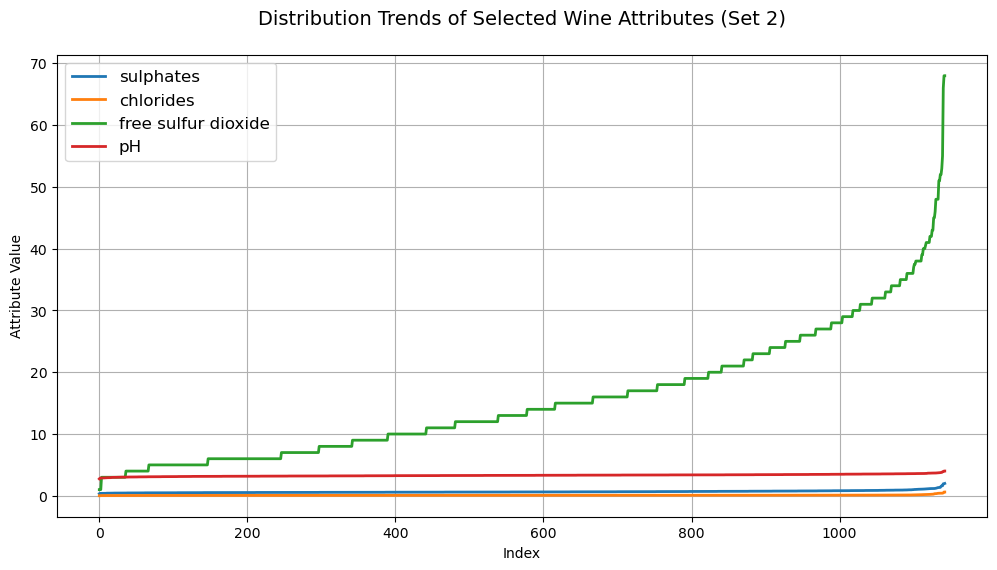

In [14]:
attributes_line = ['sulphates', 'chlorides', 'free sulfur dioxide', 'pH']

plt.figure(figsize=(12,6))
for col in attributes_line:
    plt.plot(range(len(df)), df[col].sort_values().values, label=col, linewidth=2)

plt.legend(fontsize=12)
plt.title("Distribution Trends of Selected Wine Attributes\n", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Attribute Value")
plt.grid(True)
plt.show()


# Data Mining Tasks

## K-Means Clustering Analysis

**Purpose:** The purpose of this analysis is to apply K-Means clustering to the wine dataset to identify natural groups of wines based solely on their chemical attributes.

**Key Takeaways:** 
- These clusters may reflect different potential price tiers, because higher alcohol and lower volatile acidity often correspond to higher-quality (and therefore higher-priced) wines, while opposite patterns may indicate lower-tier wines.
- The Elbow Method showed a large drop in inertia from k = 2 to k = 3, followed by slower reductions, suggesting k = 3 is the most reasonable choice for clustering.
- Overall, the clustering demonstrates that wines naturally form 3 chemically distinct groups, which could correspond to different market categories even though price labels are not available.

   

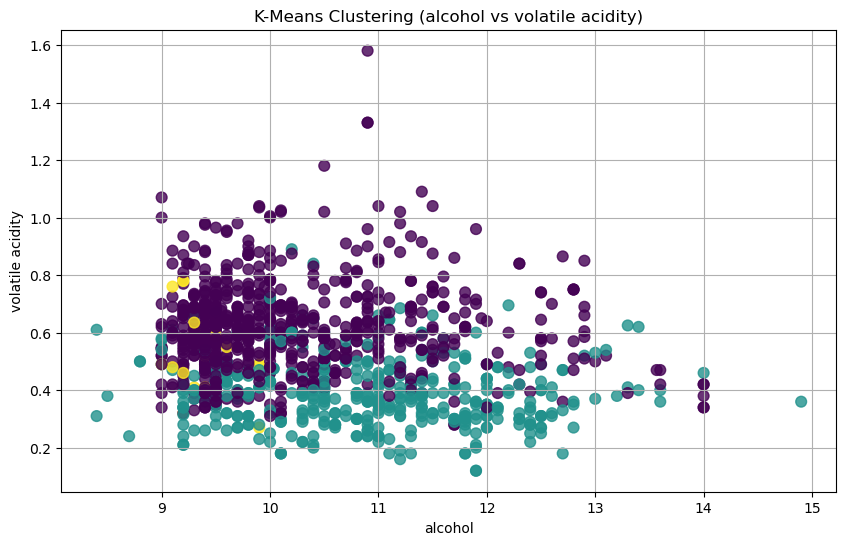

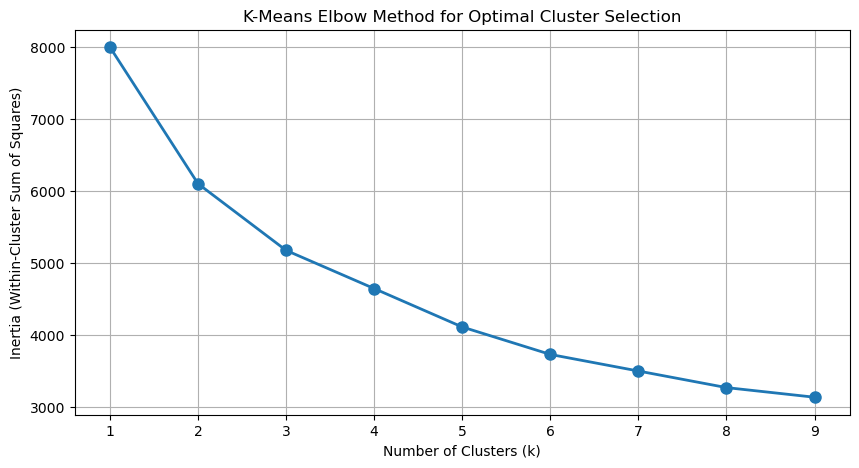

Inertia values: [8000.999999999998, 6102.320753045071, 5175.695523836563, 4644.587137249362, 4110.397334282268, 3728.671235347987, 3498.100532803897, 3267.6772719977016, 3133.8262395179736]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -----------------------------
#  Select features for clustering
# -----------------------------
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
    'free sulfur dioxide', 'sulphates', 'alcohol'
]

X = df[features]

# -----------------------------
# Standardize the data
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Fit K-means with chosen k
# -----------------------------
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

# -----------------------------
# Visualize clusters using any two features
# -----------------------------
x_feature = 'alcohol'
y_feature = 'volatile acidity'

plt.figure(figsize=(10,6))
plt.scatter(df[x_feature], df[y_feature], c=df['cluster'], cmap='viridis', s=60, alpha=0.8)

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"K-Means Clustering ({x_feature} vs {y_feature})")
plt.grid(True)
plt.show()

# -----------------------------
# Elbow Method  
# -----------------------------
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, inertia, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title("K-Means Elbow Method for Optimal Cluster Selection")
plt.grid(True)
plt.show()

print("Inertia values:", inertia)



## K-Nearest Neighbors Classification Analysis

**Purpose:** The goal of this analysis is to determine how well the chemical properties of wine can predict its quality rating using the K-Nearest Neighbors (K-NN) classification algorithm.

**Key Takeaways:**
- The optimal K-NN model uses k = 19 neighbors, determined through 5-fold cross-validation across odd values from 3 to 399.
- The best cross-validation accuracy achieved is 0.512, meaning the model correctly predicts wine quality about 51% of the time.
- K-NN performs poorly on this dataset, suggesting that the chemical attributes do not produce clear distance-based separations between wine quality categories.

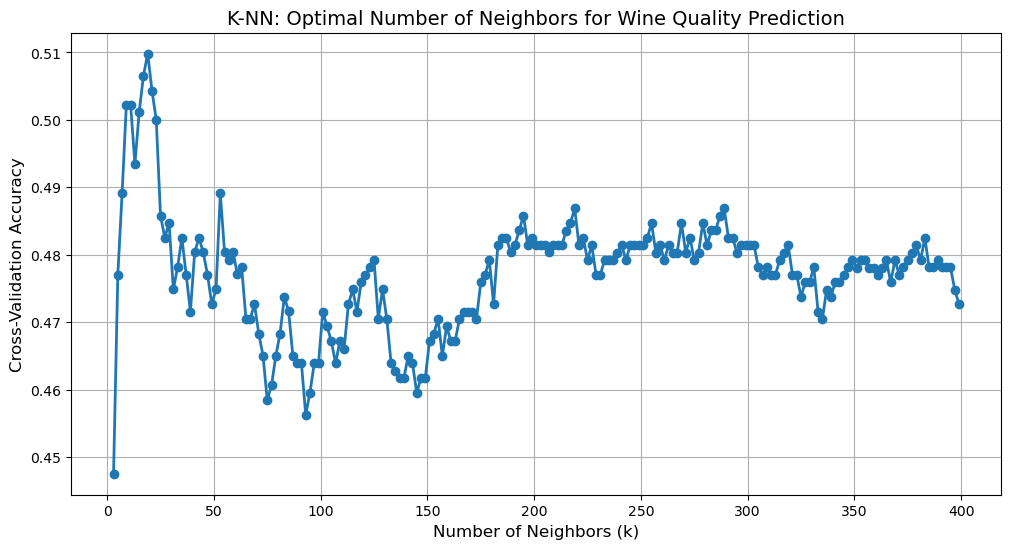

Optimal number of neighbors (k): 19
Best cross-validation accuracy: 0.510


In [24]:
# Prepare features and target
X = df.drop(columns=['quality', 'Id'])
y = df['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_values = list(range(3, 400, 2))

cv_scores = []

# Evaluate each k using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find optimal k
optimal_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('K-NN: Optimal Number of Neighbors for Wine Quality Prediction', fontsize=14)
plt.grid(True)
plt.show()

print(f"Optimal number of neighbors (k): {optimal_k}")
print(f"Best cross-validation accuracy: {best_score:.3f}")
